## Fundamentals of Statistics Class: Exercises Solutions  
#### This notebook contains the full exercise solutions in Python for the Fundamentals of Statistics Workshop covering topics on data exploration and statistics. Each exercise has specific objectives split into separate labeled cell blocks. How to generate basic data summaries, histograms, boxplots, conduct hypothesis tests of mean and variance, and ANOVA are covered using the provided datasets.

In [1]:
#Import needed libraries for all exercises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.stats.api as sms
import statsmodels.api as sm

from scipy import stats

import seaborn as sns #optional for violin plot

%matplotlib inline  

---

### Exercise 0
**Business Question:** A dataset has been shared. Import that dataset and gain basic information about it by answering the following:
* How many rows and columns does it have?
* What are the names of the columns and their data types?
* Can I get the previous information with a single call?
* What does some of the data look like?
* What are some of the characteristics of the data?
* What are the value counts of a specific column?

In [2]:
#Ex0- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/VAV 3-06 & 4-06 1stHalf.xlsx')
#df = pd.read_excel('../Datasets/VAV_EventFrames_Stats_Class.xlsx') #second dataset, uncomment and re-run to evaluate new data

In [3]:
#Ex0- How many rows and columns does it have?
df.shape

(58, 3)

In [4]:
#Ex0- What are the names of the columns and their data types?
df.dtypes

Start.time    datetime64[ns]
VAV Unit              object
RmTemp               float64
dtype: object

In [5]:
#Ex0- Can I get the previous information in one call?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
Start.time    58 non-null datetime64[ns]
VAV Unit      58 non-null object
RmTemp        58 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ KB


In [6]:
#Ex0- What does some of the data look like?
df.head()

,Start.time,VAV Unit,RmTemp
0,2017-03-15 07:01:00,VAVCO 3-06,73.5
1,2017-04-03 07:00:00,VAVCO 3-06,74.0
2,2017-04-04 07:04:00,VAVCO 3-06,73.0
3,2017-04-05 07:01:00,VAVCO 3-06,73.0
4,2017-04-06 07:08:00,VAVCO 3-06,73.0


In [7]:
#Ex0- What are some of the characteristics of the data?
df.describe(include='all') #choosing to include all columns

,Start.time,VAV Unit,RmTemp
count,58,58,58.000000
unique,29,2,NaN
top,2017-06-07 07:02:00,VAVCO 3-06,NaN
freq,2,29,NaN
first,2017-03-15 07:01:00,NaN,NaN
last,2017-07-03 04:11:00,NaN,NaN
mean,NaN,NaN,73.862069
std,NaN,NaN,1.107364
min,NaN,NaN,73.000000
25%,NaN,NaN,73.000000


In [8]:
#Ex0- What are the value counts of a specific column?
df['RmTemp'].value_counts() #RmTemp is the column of interest in first dataset, comment out for first dataset
#df['Setpoint.reached'].value_counts() #Setpoint.reached is the column of interest in second dataset, uncomment for second dataset

73.0    24
74.0    11
73.5     8
74.5     5
75.0     5
75.5     3
78.0     2
Name: RmTemp, dtype: int64

---

### Exercise 1
**Business Question:** Part tolerance data (Tolerance Stack.xlsx) has been collected from a part manufacturing process. The tolerances are measured at various locations on the part.
* Create a histogram to visualize the overall distribution of tolerances over the entire part
* Evaluate the effect of bin size on result
* Using histograms for each location, assess the location effect of the tolerance measurements

In [9]:
#Ex1- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/Tolerance Stack.xlsx')
df.head()

,LOC,TOL
0,LOC 01,0.040200
1,LOC 02,0.037800
2,LOC 03,0.049933
3,LOC 04,0.036733
4,LOC 05,0.030467


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fe5a96860>]],
      dtype=object)

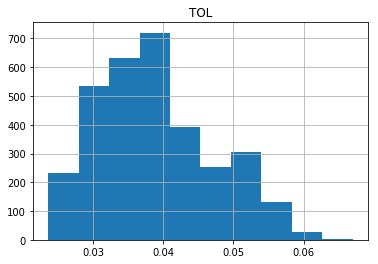

In [10]:
#Ex1- Create a histogram to visualize the overall distribution of tolerances over the entire part
df.hist() #plots histogram for numeric columns; tolerance is the only one in this dataframe 

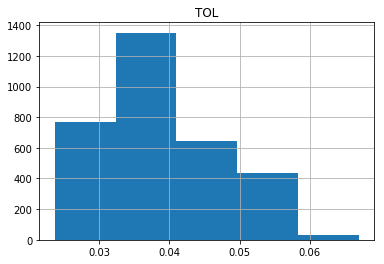

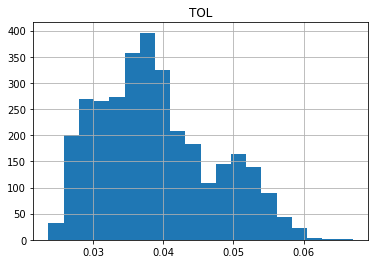

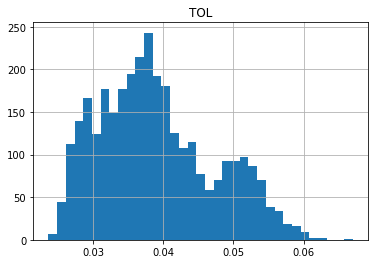

In [11]:
#Ex1- Evaluate the effect of bin size on result
for b in range(5,40,15): #iterates over range of bin sizes
    df.hist(bins=b)

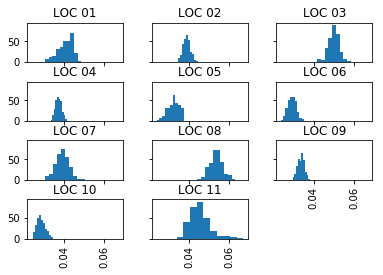

In [12]:
#Ex1- Using histograms for each location, assess the location effect of the tolerance measurements
df['TOL'].hist(by=df['LOC'],sharex=True,sharey=True)
plt.show() #added to reduce messages in output

---

### Exercise 2
**Business Question:** Part tolerance data (Tolerance Stack.xlsx) has been collected from a part manufacturing process. The tolerances are measured at various locations on the part.
* Create a boxplot to visualize the overall distribution of tolerances over the entire part
* Using boxplots for each location, assess the location effect of the tolerance measurements

In [13]:
#Ex2- Data was already read from the excel file and a dataframe called df created in Ex1
df.head()

,LOC,TOL
0,LOC 01,0.040200
1,LOC 02,0.037800
2,LOC 03,0.049933
3,LOC 04,0.036733
4,LOC 05,0.030467


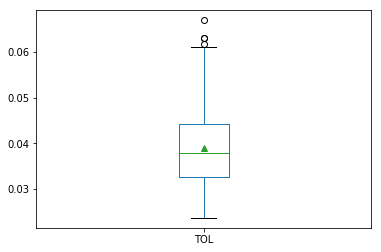

In [14]:
#Ex2- Create a Boxplot to visualize the overall distribution of tolerances over the entire part
df.boxplot(showmeans=True,grid=False) #plots boxplot for numeric columns; tolerance is the only one in this dataframe 

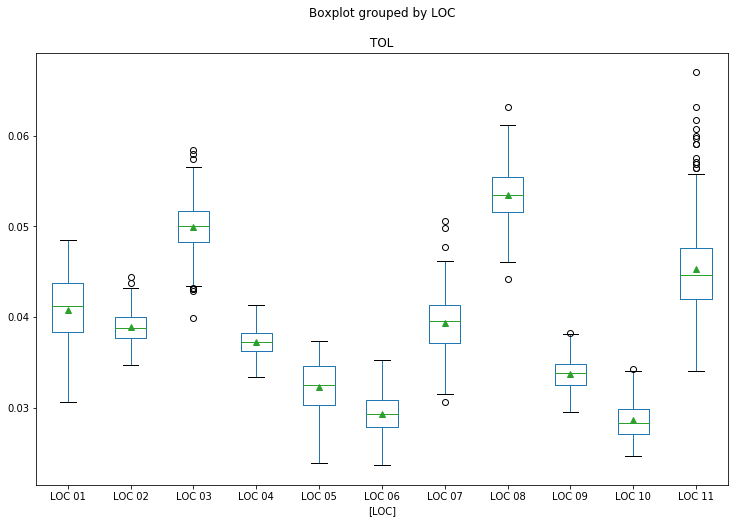

In [15]:
#Ex2- Using boxplots for each location, assess the location effect of the tolerance measurements
df.boxplot(by='LOC',figsize=(12,8),showmeans=True,grid=False) #subplots by location

---

### Exercise 3
**Business Question:** Historically, metal elongation has averaged 2% ($\mu_0=2$) with a known $\sigma^2=0.03$. Examine the current data set (Elongation.xlsx) to determine if the mean elongation has increased from its historically expected value.
* Conduct a one-sided z-test at $\alpha=.05$ to evaluate the null and alternate hypotheses:
$$
H_0 : \mu \le \mu_0 \\
H_a : \mu > \mu_0
$$

In [16]:
#Ex3- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/Elongation.xlsx')
df.head()

,Elongation
0,2.42
1,2.09
2,2.17
3,1.91
4,2.50


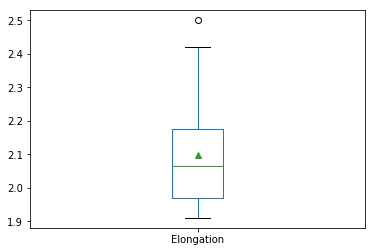

In [17]:
#Ex3- Visualize the data as a boxplot
df.boxplot(showmeans=True,grid=False)

In [18]:
#Ex3 - Conduct a one-sided z-test 
mu0 = 2
n = df.shape[0]

zscore = (df['Elongation'].mean() - mu0) / (np.sqrt(.03/n))
pvalue = 1-stats.norm.cdf(abs(zscore)) #if this was a 2-sided test, we would multiply this by 2
print('Z-score: %.4f' %zscore)
print('p-value: %.4f' %pvalue)


Z-score: 2.2805
p-value: 0.0113


**Interpretation:** Since $p<.05$, we reject $H_0$ at the $\alpha=.05$ level. There is sufficient evidence to show that the mean elongation is greater than 2 percent.

---

### Exercise 4
**Business Question:** Coating thickness of tablets in a drug manufacturing process (Thickness.xlsx) must meet a specification of $\mu=40$. $\sigma^2$ is assumed to be *UNKNOWN*. 
* Conduct a hypothesis test at $\alpha$ = 0.05 (95% confidence interval) to determine if $H_0$: $\mu$=40 is an acceptable hypothesis:
$$
H_0: \mu=\mu_0 \\
\text{vs}\\
H_a: \mu \ne \mu_0
$$

In [19]:
#Ex4- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/Thickness.xlsx')
df.head()

,Tablet,Coating thickness
0,1,39.04
1,2,39.05
2,3,39.09
3,4,38.92
4,5,39.04


In [20]:
#Ex4- Conduct a hypothesis test
mu0 = 40

stats.ttest_1samp(
    df['Coating thickness'],
    popmean=40
)

Ttest_1sampResult(statistic=-10.158710918080272, pvalue=4.61168873624716e-11)

**Interpretation:** Since $p<.05$, we reject $H_0$ at the $\alpha=.05$ level. There is sufficient evidence to show that the mean thickness is not 40.

---

### Exercise 5: 
**Business Question:** We want to determine information about the mean coating thickness of tablets in a drug manufacturing process (Thickness.xlsx).
* Construct a 95% confidence interval (range of values for which we can be 95% certain contain the true mean of the tablets, $\mu$);  $\sigma^2$ is assumed to be *UNKNOWN*.

In [21]:
#Ex5- Data was already read from the excel file and a dataframe called df created in Ex4
df.head()

,Tablet,Coating thickness
0,1,39.04
1,2,39.05
2,3,39.09
3,4,38.92
4,5,39.04


In [22]:
#Ex5- Construct a 95% confidence interval
mean,var,stdev = stats.bayes_mvs(
    data = df['Coating thickness'], 
    alpha=.95
)

print(mean)

print('\n95 percent CI: %.2f < mu < %.2f' % mean.minmax)

Mean(statistic=39.38000000000001, minmax=(39.25517684198835, 39.50482315801167))

95 percent CI: 39.26 < mu < 39.50


---

### Exercise 6
**Business Question:** Batch yield data (Tanks Stacked.xlsx) has been gathered from two reactor tanks in a chemical production process. We will test whether the Tanks produce the same mean yields after we do a comparison of the variances.
* Visually compare the tank data. Give some visual conclusions/conjectures
* Test the hypothesis that the variances are the same for both tanks
* Conduct the hypothesis test that the mean yields are the same

In [23]:
#Ex6- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/Tanks Stacked.xlsx')
df.head()

,Batch,Tank,Yield
0,1,Tank A,39.04
1,1,Tank B,38.61
2,2,Tank A,39.05
3,2,Tank B,38.65
4,3,Tank A,39.09


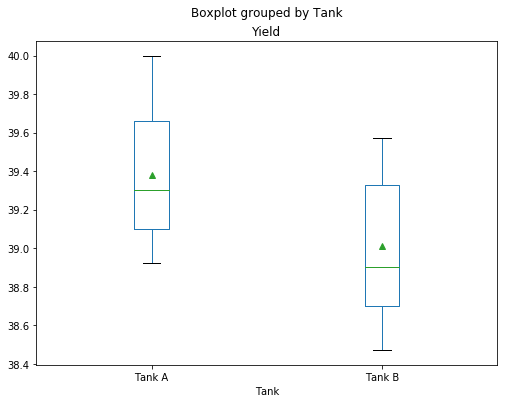

In [24]:
#Ex6- Visually compare the tank data
df.boxplot(
    column='Yield',
    by='Tank',
    showmeans=True,
    grid=False,
    figsize=(8,6)
)

In [25]:
#Ex6- Test the hypothesis that the variances are the same for both tanks

TankA = df['Tank'] == 'Tank A' #indicies for Tank A observations
TankB = df['Tank'] == 'Tank B' #indicies for Tank B observations

#Manually calculate the F statistic and degrees of freedom

F = np.var(df[TankA]['Yield'])/np.var(df[TankB]['Yield'])
df1 = len(df[TankA]['Yield']) - 1
df2 = len(df[TankB]['Yield']) - 1

#Calculate the p-value based on the F distribution
pvalue = stats.f.cdf(F, df1, df2)

#Does the CDF calculate a one- or two-tailed probability? 
pvalue = 2*pvalue   #uncomment if stats.f.cdf returns one-tailed probability

#Print results
print('p-Value = %.4f' % pvalue)
print('F Test = %.4f' % F)

p-Value = 0.7304
F Test = 0.8788


**Interpretation:** We cannot reject the null hypothesis (p-value > 0.05), so we accept that the variances are equal

In [26]:
#Ex6- Conduct the hypothesis test that the mean yields are the same
stats.ttest_ind(
    a = df[TankA]['Yield'], 
    b = df[TankB]['Yield'], 
    equal_var = True)

Ttest_indResult(statistic=4.120139585001012, pvalue=0.00012179770327480893)

**Interpretation:** We reject the null hypothesis (p-value < 0.05), so the mean yields are not the same

---

### Exercise 7
**Business Question:** 20 daily weight measurements are taken from metal production at two plants (Weights.xlsx). Are the mean daily weights from the plants different?

* Visually compare the North and South Plant weight data. Give some visual conclusions/conjectures.
* Test the hypothesis that the variances are the same for both plants. 
* Conduct the hypothesis test that the mean weights are the same  Η<sub>0</sub>: μ<sub>A</sub> - μ<sub>B</sub> = 0 vs Η<sub>1</sub>: μ<sub>A</sub> - μ<sub>B</sub> ≠ 0, assuming  unknown σ<sup>2</sup><sub>A</sub> ≠ σ<sup>2</sup><sub>B</sub>)


In [27]:
#Ex7- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/Weights.xlsx')
df.head()

,Location,Weight
0,North,48.06
1,North,31.60
2,North,46.84
3,North,49.25
4,North,34.24


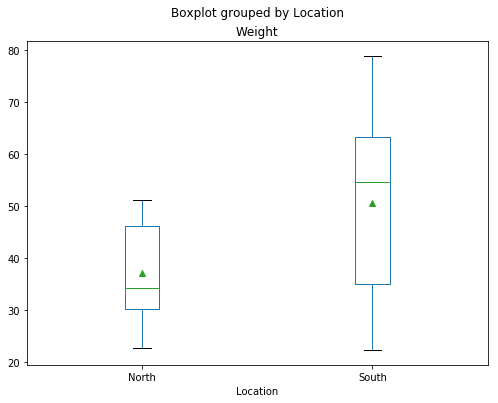

In [28]:
#Ex7- Visually compare the North and South Plant weight data
df.boxplot(column='Weight',by='Location',showmeans=True,grid=False,figsize=(8,6))

In [29]:
#Ex7- Test the hypothesis that the variances are the same for both plants
North = df['Location'] == 'North'
South = df['Location'] == 'South'

#Manually calculate the F statistic and degrees of freedom
F = np.var(df[North]['Weight'])/np.var(df[South]['Weight'])
df1=len(df[North]['Weight'])-1
df2=len(df[South]['Weight'])-1

#Calculate the p-value based on the F distribution
pvalue = stats.f.cdf(F, df1, df2)

#Print results
print('p-Value = %.4f' % (2*pvalue))
print('F Test = %.4f' % F)

p-Value = 0.0200
F Test = 0.3305


**Interpretation:** We reject the null hypothesis (p-value < 0.05), so the variances are not equal

In [30]:
#Ex7- Conduct the hypothesis test that the mean weights are the same
stats.ttest_ind(
    a = df[South]['Weight'], 
    b = df[North]['Weight'], 
    equal_var = False)

Ttest_indResult(statistic=3.236450410406437, pvalue=0.0029247849003876587)

**Interpretation:** We reject the null hypothesis (p-value < 0.05), so the mean weights are not the same

---

### Exercise 8: 
**Business Question:** We want to look at the relationship between velocity and strength in our welding data (Welding.xlsx).
* Plot welding data as a scatterplot
* Fit a regression line to determine if the regression coefficients are statistically significant. Fit "Strength" by "Velocity".

In [31]:
#Ex8- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/Welding.xlsx')
df.head()

,velocity,strength
0,2.00,89
1,2.50,97
2,2.50,91
3,2.75,98
4,3.00,100


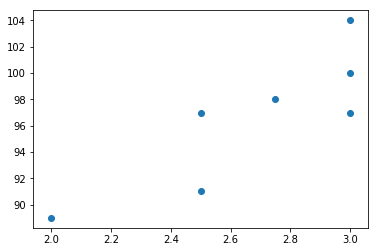

In [32]:
#Ex8- Plot welding data as a scatterplot
plt.scatter(
    x = df['velocity'],
    y = df['strength']
)

In [33]:
#Ex8- Fit a regression line to determine if the regression coefficients are statistically significant.

#Since the raw values don't contain a constant term, create a copy of the dataset with a constant
x = df['velocity'].copy()
x = sm.add_constant(x)

mod = sm.OLS(
    endog=df['strength'],
    exog=x
).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     13.08
Date:                Fri, 30 Nov 2018   Prob (F-statistic):             0.0153
Time:                        12:21:45   Log-Likelihood:                -16.336
No. Observations:                   7   AIC:                             36.67
Df Residuals:                       5   BIC:                             36.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3404      8.707      7.504      0.0

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


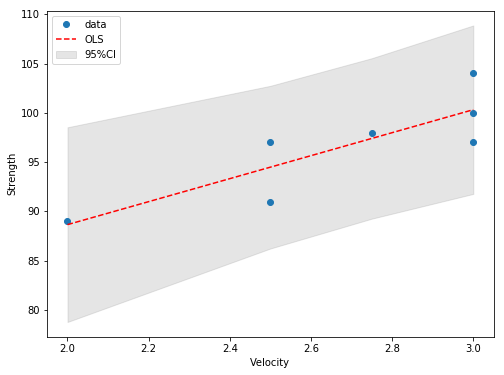

In [34]:
#Ex8- Fit a regression line to determine if the regression coefficients are statistically significant.
#BONUS: Plot regression line with confidence intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(mod)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x['velocity'], df['strength'], 'o', label="data")
ax.plot(x['velocity'], mod.fittedvalues, 'r--', label="OLS")
ax.fill_between(x['velocity'], y1=iv_l, y2=iv_u, color='gray', alpha=.2, label='95%CI')
ax.legend(loc='upper left')

plt.xlabel('Velocity')
plt.ylabel('Strength')
plt.show()

**Interpretation:** The p-values of both the intercept and velocity coefficients are < 0.05 so we accept that the coefficients are statistically significant.

---

### Exercise 9
**Business Question:** Machine tolerance data (MachineTol.xlsx) was measured on a part at 5 locations: L1-L5. Conduct an analysis of variance of machine tolerance to determine if the population means associated with locations L1-L5 are the same or are different.
* Plot machine tolerance by location
* Show the results of an ANOVA and provide the conclusion to the hypothesis test
* Conduct a multiple comparison test to determine what pairs might be different using the All Pairs Tukey-Kramer HSD method. What means are different or not?
* Conduct a multiple comparison test to determine if a location exists that exhibits the best (lowest) mean tolerance using the Compare Best, Hsu MCB method. Are any of the means "best"?

In [35]:
#Ex9- Read the data from the excel file and create a dataframe
df = pd.read_excel('../Datasets/MachineTol.xlsx')
df.head()

,Location,Mach Tol
0,L1,0.037800
1,L1,0.038538
2,L1,0.038000
3,L1,0.039722
4,L1,0.040333


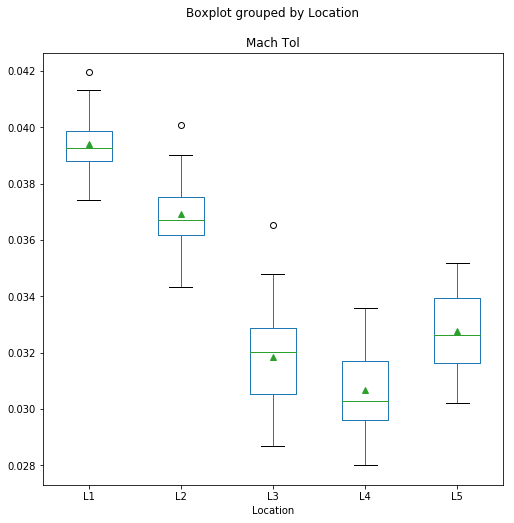

In [36]:
#Ex9- Plot machine tolerance by location
#using boxplot
df.boxplot(column='Mach Tol',by='Location',showmeans=True,grid=False,figsize=(8,8))
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


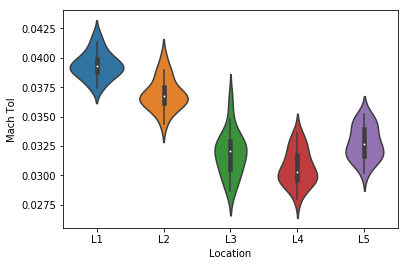

In [37]:
#Ex9- Plot machine tolerance by location
#using violin plot
sns.violinplot(
    data=df,
    x='Location',
    y='Mach Tol'
)

In [38]:
#Ex9- Show the results of an ANOVA and provide the conclusion to the hypothesis test

#Spaces can be a hassle, so renaming columns can be helpful
df.rename(index=str, columns={"Mach Tol":"MachTol"}, inplace=True)

#Statsmodels can use R-style formulas: y ~ x1 + C(x2) + ...
#In that formula, [y, x1, x2] are column names and 'C(x2)' means 'treat x2 as categorical'

formula = 'MachTol ~ C(Location)'

#Generate the fitted model
model = sm.formula.ols(
    formula = formula, 
    data = df
).fit()

#Print the ANOVA table
aov_table = sms.anova_lm(model)
print(aov_table)

               df    sum_sq   mean_sq           F        PR(>F)
C(Location)   4.0  0.001089  0.000272  123.410287  9.660271e-37
Residual     95.0  0.000210  0.000002         NaN           NaN


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  L1     L2   -0.0025  -0.0038 -0.0012  True 
  L1     L3   -0.0075  -0.0088 -0.0062  True 
  L1     L4   -0.0087   -0.01  -0.0074  True 
  L1     L5   -0.0066  -0.0079 -0.0053  True 
  L2     L3   -0.0051  -0.0064 -0.0038  True 
  L2     L4   -0.0063  -0.0076  -0.005  True 
  L2     L5   -0.0042  -0.0055 -0.0029  True 
  L3     L4   -0.0012  -0.0025  0.0001 False 
  L3     L5    0.0009  -0.0004  0.0022 False 
  L4     L5    0.0021   0.0008  0.0034  True 
---------------------------------------------


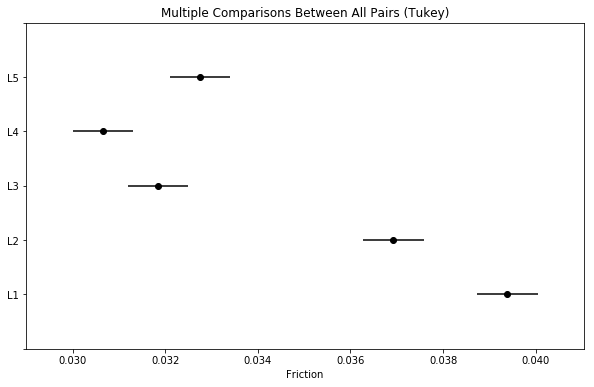

In [39]:
#Ex9- Conduct a multiple comparison test to determine what pairs might be different using the All Pairs 
#Tukey-Kramer HSD method

res = sms.multicomp.pairwise_tukeyhsd(
    endog = df['MachTol'], 
    groups = df['Location']
)

#Print a summary of pairwise p-values
print(res.summary())

#Visually inspect confidence intervals
res.plot_simultaneous(xlabel='Friction')
plt.show()

In [40]:
#Ex9- To find the best location with Hsu's MCB method use JMP instead